In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['diabetes_class'].value_counts()

0    500
1    268
Name: diabetes_class, dtype: int64

In [4]:
df.describe()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isna().any(axis=0)

preg_count                     False
glucose_concentration          False
diastolic_bp                   False
triceps_skin_fold_thickness    False
two_hr_serum_insulin           False
bmi                            False
diabetes_pedi                  False
age                            False
diabetes_class                 False
dtype: bool

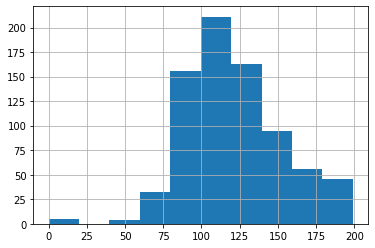

In [6]:
df['glucose_concentration'].hist()
plt.show()

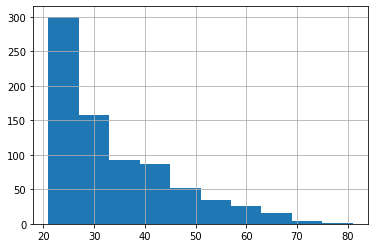

In [7]:
df['age'].hist()
plt.show()

In [8]:
diabetic = df.diabetes_class == 1
normal = df.diabetes_class == 0

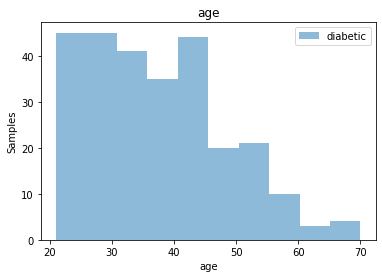

In [9]:
plt.hist(df[diabetic].age,alpha=0.5,label='diabetic')
plt.title('age')
plt.xlabel('age')
plt.ylabel('Samples')
plt.legend()
plt.show()

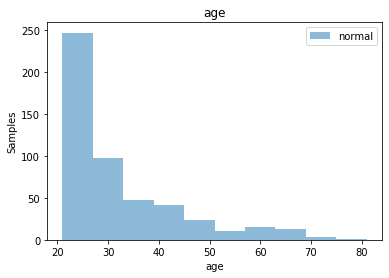

In [10]:
plt.hist(df[normal].age,alpha=0.5,label='normal')
plt.title('age')
plt.xlabel('age')
plt.ylabel('Samples')
plt.legend()
plt.show()

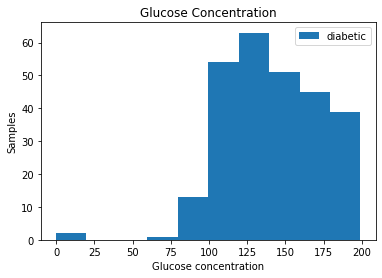

In [11]:
plt.hist(df[diabetic].glucose_concentration,label='diabetic')
plt.title('Glucose Concentration')
plt.xlabel('Glucose concentration')
plt.ylabel('Samples')
plt.legend()
plt.show()

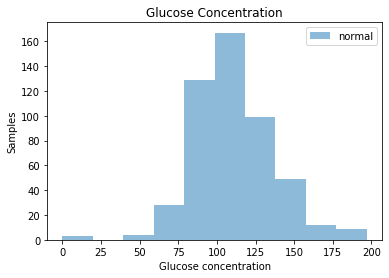

In [12]:
plt.hist(df[normal].glucose_concentration,alpha=0.5,label='normal')
plt.title('Glucose Concentration')
plt.xlabel('Glucose concentration')
plt.ylabel('Samples')
plt.legend()
plt.show()

In [13]:
# Split Data

In [14]:
X=df.iloc[:,:-1]

In [15]:
X.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [16]:
y=df.iloc[:,-1]

In [17]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes_class, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
xTrain.head(2)

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22


In [21]:
yTrain.head(2)

603    1
118    0
Name: diabetes_class, dtype: int64

In [22]:
trainDF=xTrain.join(yTrain)
trainDF.head(5)

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
603,7,150,78,29,126,35.2,0.692,54,1
118,4,97,60,23,0,28.2,0.443,22,0
247,0,165,90,33,680,52.3,0.427,23,0
157,1,109,56,21,135,25.2,0.833,23,0
468,8,120,0,0,0,30.0,0.183,38,1


In [23]:
testDF=xTest.join(yTest)
testDF.head(5)

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
661,1,199,76,43,0,42.9,1.394,22,1
122,2,107,74,30,100,33.6,0.404,23,0
113,4,76,62,0,0,34.0,0.391,25,0
14,5,166,72,19,175,25.8,0.587,51,1
529,0,111,65,0,0,24.6,0.660,31,0


In [24]:
column=[ 'diabetes_class',
        'preg_count',
 'glucose_concentration',
 'diastolic_bp',
 'triceps_skin_fold_thickness',
 'two_hr_serum_insulin',
 'bmi',
 'diabetes_pedi',
 'age',
]

In [25]:
trainDF=trainDF[column]

In [26]:
trainDF.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
603,1,7,150,78,29,126,35.2,0.692,54
118,0,4,97,60,23,0,28.2,0.443,22
247,0,0,165,90,33,680,52.3,0.427,23
157,0,1,109,56,21,135,25.2,0.833,23
468,1,8,120,0,0,0,30.0,0.183,38


In [27]:
testDF=testDF[column[1:]]
testDF.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31


In [28]:
# Write Training Set
trainDF.to_csv('train.csv',index=False,index_label='Row',header=False,columns=column)

In [29]:
testDF.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31


In [30]:
testDF.to_csv('test.csv',index=False,index_label='Row',header=False)

# Train in Sagemaker

#### Upload data from local to S3

In [31]:
import boto3
import re


In [32]:
bucketNM = 'ec2-east-sagemaker-demo'

TrainFile = r'LogisticR/Train/Train.csv'
TestFile = r'LogisticR/Test/Test.csv'
Valfile = r'LogisticR/Val/Val.csv'
ModelFolder=r'LogisticR/model/'

In [33]:
s3ModelOutput= r's3://{0}/{1}'.format(bucketNM,ModelFolder)
s3Train = r's3://{0}/{1}'.format(bucketNM,TrainFile)
s3Test = r's3://{0}/{1}'.format(bucketNM,TestFile)
s3Val = r's3://{0}/{1}'.format(bucketNM,Valfile)

In [34]:
s3ModelOutput

's3://ec2-east-sagemaker-demo/LogisticR/model/'

In [35]:
with open('train.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucketNM).Object(TrainFile).upload_fileobj(f)

In [36]:
with open('test.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucketNM).Object(TestFile).upload_fileobj(f)

### Build and Train Model in Sagemaker

In [37]:
import sagemaker
from sagemaker import get_execution_role

In [38]:
sagemakerSess=sagemaker.Session()
role=get_execution_role()

In [39]:
sagemakerSess.boto_region_name

'us-east-1'

In [40]:
ECRdockercontainer=sagemaker.amazon.amazon_estimator.get_image_uri(sagemakerSess.boto_region_name,'linear-learner','latest')

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


In [41]:
LogisticModel=sagemaker.estimator.Estimator(image_name=ECRdockercontainer,
                                            role=role,
                                            train_instance_count=1,
                                        train_instance_type='ml.m4.xlarge',
                                        output_path=s3ModelOutput,
                                        sagemaker_session=sagemakerSess,
                                        base_job_name ='Logistic-Demo-v1'
                                        )

In [42]:
LogisticModel.set_hyperparameters(predictor_type='binary_classifier',mini_batch_size=100)

In [43]:
LogisticModel.hyperparameters()

{'predictor_type': 'binary_classifier', 'mini_batch_size': 100}

In [44]:
trainConfig=sagemaker.session.s3_input(s3_data=s3Train,content_type='text/csv')

In [45]:
LogisticModel.fit({'train': trainConfig})

2020-07-27 03:39:17 Starting - Starting the training job...
2020-07-27 03:39:19 Starting - Launching requested ML instances......
2020-07-27 03:40:34 Starting - Preparing the instances for training......
2020-07-27 03:41:36 Downloading - Downloading input data......
2020-07-27 03:42:44 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[07/27/2020 03:42:48 INFO 140629178537792] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': u'auto', u'in


2020-07-27 03:43:11 Uploading - Uploading generated training model
2020-07-27 03:43:11 Completed - Training job completed
Training seconds: 95
Billable seconds: 95


In [46]:
# Deploy

In [47]:
predictmodel=LogisticModel.deploy(initial_instance_count=1,instance_type='ml.m4.xlarge',
                                  endpoint_name='LogisticRegression-Demo-v1')

---------------!

In [48]:
from sagemaker.predictor import csv_serializer, json_deserializer

In [49]:

predictmodel.content_type = 'text/csv'
predictmodel.serializer = csv_serializer
predictmodel.deserializer = None

In [50]:
testdata= pd.read_csv('test.csv',header=None)
testdata.head()

,0,1,2,3,4,5,6,7
0,1,199,76,43,0,42.9,1.394,22
1,2,107,74,30,100,33.6,0.404,23
2,4,76,62,0,0,34.0,0.391,25
3,5,166,72,19,175,25.8,0.587,51
4,0,111,65,0,0,24.6,0.660,31


In [51]:
k = np.array(testdata).astype('float32')

In [52]:
k


array([[1.000e+00, 1.990e+02, 7.600e+01, ..., 4.290e+01, 1.394e+00,
        2.200e+01],
       [2.000e+00, 1.070e+02, 7.400e+01, ..., 3.360e+01, 4.040e-01,
        2.300e+01],
       [4.000e+00, 7.600e+01, 6.200e+01, ..., 3.400e+01, 3.910e-01,
        2.500e+01],
       ...,
       [4.000e+00, 1.420e+02, 8.600e+01, ..., 4.400e+01, 6.450e-01,
        2.200e+01],
       [3.000e+00, 1.160e+02, 7.400e+01, ..., 2.630e+01, 1.070e-01,
        2.400e+01],
       [1.000e+00, 1.070e+02, 7.200e+01, ..., 3.080e+01, 8.210e-01,
        2.400e+01]], dtype=float32)

In [53]:
predictmodel.predict(k)

b'{"predictions": [{"score": 0.9480687379837036, "predicted_label": 1}, {"score": 0.16256341338157654, "predicted_label": 0}, {"score": 0.08664942532777786, "predicted_label": 0}, {"score": 0.6317563056945801, "predicted_label": 1}, {"score": 0.11403058469295502, "predicted_label": 0}, {"score": 0.03909594938158989, "predicted_label": 0}, {"score": 0.7491811513900757, "predicted_label": 1}, {"score": 0.834694504737854, "predicted_label": 1}, {"score": 0.38677677512168884, "predicted_label": 1}, {"score": 0.35957613587379456, "predicted_label": 0}, {"score": 0.5763237476348877, "predicted_label": 1}, {"score": 0.9503003358840942, "predicted_label": 1}, {"score": 0.27509433031082153, "predicted_label": 0}, {"score": 0.170517235994339, "predicted_label": 0}, {"score": 0.12662731111049652, "predicted_label": 0}, {"score": 0.1513611227273941, "predicted_label": 0}, {"score": 0.8616264462471008, "predicted_label": 1}, {"score": 0.026861999183893204, "predicted_label": 0}, {"score": 0.4174022

In [54]:
endpoint_name='LogisticRegression-Demo-v1'
predictor = sagemaker.predictor.RealTimePredictor(endpoint=endpoint_name)

In [55]:
from sagemaker.predictor import csv_serializer, json_deserializer

predictor.content_type = 'text/csv'
predictor.serializer = csv_serializer
predictor.deserializer = None

In [56]:
predictor.predict(k)

b'{"predictions": [{"score": 0.9480687379837036, "predicted_label": 1}, {"score": 0.16256341338157654, "predicted_label": 0}, {"score": 0.08664942532777786, "predicted_label": 0}, {"score": 0.6317563056945801, "predicted_label": 1}, {"score": 0.11403058469295502, "predicted_label": 0}, {"score": 0.03909594938158989, "predicted_label": 0}, {"score": 0.7491811513900757, "predicted_label": 1}, {"score": 0.834694504737854, "predicted_label": 1}, {"score": 0.38677677512168884, "predicted_label": 1}, {"score": 0.35957613587379456, "predicted_label": 0}, {"score": 0.5763237476348877, "predicted_label": 1}, {"score": 0.9503003358840942, "predicted_label": 1}, {"score": 0.27509433031082153, "predicted_label": 0}, {"score": 0.170517235994339, "predicted_label": 0}, {"score": 0.12662731111049652, "predicted_label": 0}, {"score": 0.1513611227273941, "predicted_label": 0}, {"score": 0.8616264462471008, "predicted_label": 1}, {"score": 0.026861999183893204, "predicted_label": 0}, {"score": 0.4174022